In [1]:
#Importing dataset
from keras.datasets import imdb
import warnings
warnings.filterwarnings('ignore')

2025-11-04 08:25:58.099210: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1762244758.307281      37 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1762244758.363723      37 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
#Loading the dataset
NUM_WORDS = 10000 
(X_train,y_train),(X_test,y_test)= imdb.load_data(num_words=NUM_WORDS)

print(f"X_Train:{X_train.shape}\nY_Train:{y_train.shape}")

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
X_Train:(25000,)
Y_Train:(25000,)


In [3]:
#Reviewing the data at 0th index
print(f"{X_train[0]}\n\n{y_train[0]}")

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]

1


In [4]:
#Word to id
MAX_LENGTH = 200
word_to_id = imdb.get_word_index()
word_to_id
    

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [5]:
#Reverse ids to words
id_to_word = {value: key for key,value in word_to_id.items()}
for id in X_train[0]:
    word = id_to_word[id]
    print(word,end=" ")

the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but and to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other and in of seen over landed for anyone of and br show's to whether from than out themselves history he name half some br of and odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart to real at barrel but when from one bit then have tw

In [6]:
#Padding
from keras.preprocessing.sequence import pad_sequences

X_train = pad_sequences(X_train,maxlen=200)
X_test = pad_sequences(X_test,maxlen=200)

In [7]:
X_train.shape

(25000, 200)

In [8]:
X_test.shape

(25000, 200)

In [10]:
#Model initialization
from keras.models import Sequential
from keras.layers import Embedding,LSTM,Dense

model = Sequential([
    Embedding(NUM_WORDS,64,input_length=MAX_LENGTH),
    LSTM(200,dropout=0.3,recurrent_dropout=0.3),
    Dense(1,activation='sigmoid')
])

In [11]:
#Model to be complied
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [13]:
#Model training
hist = model.fit(X_train,y_train,batch_size=64,epochs=12,verbose='auto',validation_data=(X_test,y_test))

Epoch 1/12
391/391 ━━━━━━━━━━━━━━━━━━━━ 225s 574ms/step - accuracy: 0.8437 - loss: 0.3668 - val_accuracy: 0.8593 - val_loss: 0.3481
Epoch 2/12
391/391 ━━━━━━━━━━━━━━━━━━━━ 224s 573ms/step - accuracy: 0.8806 - loss: 0.2928 - val_accuracy: 0.8556 - val_loss: 0.3574
Epoch 3/12
391/391 ━━━━━━━━━━━━━━━━━━━━ 224s 574ms/step - accuracy: 0.8974 - loss: 0.2573 - val_accuracy: 0.8488 - val_loss: 0.3664
Epoch 4/12
391/391 ━━━━━━━━━━━━━━━━━━━━ 224s 574ms/step - accuracy: 0.9159 - loss: 0.2197 - val_accuracy: 0.8478 - val_loss: 0.3787
Epoch 5/12
391/391 ━━━━━━━━━━━━━━━━━━━━ 225s 576ms/step - accuracy: 0.9244 - loss: 0.1979 - val_accuracy: 0.8425 - val_loss: 0.4208
Epoch 6/12
391/391 ━━━━━━━━━━━━━━━━━━━━ 225s 575ms/step - accuracy: 0.9117 - loss: 0.2243 - val_accuracy: 0.8542 - val_loss: 0.4032
Epoch 7/12
391/391 ━━━━━━━━━━━━━━━━━━━━ 225s 575ms/step - accuracy: 0.9476 - loss: 0.1457 - val_accuracy: 0.8560 - val_loss: 0.4478
Epoch 8/12
391/391 ━━━━━━━━━━━━━━━━━━━━ 225s 575ms/step - accuracy: 0.9556 -

In [14]:
#Model evaluation
val_loss,val_acc = model.evaluate(X_train,y_train)
print(f"Loss:{val_loss}\nAccuracy:{val_acc}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 73s 94ms/step - accuracy: 0.9696 - loss: 0.0792
Loss:0.07983274757862091
Accuracy:0.9691600203514099


In [15]:
temp = pad_sequences([X_train[0]],maxlen=200)
movie_review = model.predict(temp)
print(f"MOVIE REVIEW:{'Positive' if movie_review>=0.5 else 'Negative'}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 565ms/step
MOVIE REVIEW:Positive


In [16]:
#Reverse ids to words
id_to_word2 = {value: key for key,value in word_to_id.items()}
for id in X_train[0]:
    word = id_to_word2[id]
    print(word,end=" ")
    

to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but and to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other and in of seen over landed for anyone of and br show's to whether from than out themselves history he name half some br of and odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart to real at barrel but when from one bit then have two of script their with her nobody most that with wasn't to with armed acting watch an for with heartfelt fil

In [17]:
#Testing with the model performance
review = pad_sequences([X_train[1]],maxlen=200)
result = model.predict(review)

print(f"REVIEW:\n{'Positive' if result>=0.5 else 'Negative'}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
REVIEW:
Negative


In [18]:
#Let's test it with completely different data for this model
sentiment =  "The film was just brilliant."
#LOWERCASING
sentiment = sentiment.lower()
sentiment


'the film was just brilliant.'

In [19]:
#Replacing punctuation
sentiment = sentiment.replace('.','')
sentiment

'the film was just brilliant'

In [20]:
#WORD_to_id
analysis =[]
for word in sentiment.split(" "):
    if word in word_to_id:
        analysis.append(word_to_id[word]+3)
    else:
        analysis.append(2)

analysis
        

[4, 22, 16, 43, 530]

In [21]:
#Padding
analysis = pad_sequences([analysis],maxlen=200)
analysis.shape

(1, 200)

In [24]:
#Predicting the result
sentiment_analysis = model.predict(analysis)
print(f"MOVIE REVIEW: {'Positive' if sentiment_analysis>=0.5 else 'Negative'}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
MOVIE REVIEW: Positive


In [30]:
mov_Rev = "What a waste of time. The plot was nonsensical, the characters were poorly developed, and the ending was completely disappointing. I would not watch this again."

#Lowercasing
mov_Rev  = mov_Rev.lower()
mov_Rev

'what a waste of time. the plot was nonsensical, the characters were poorly developed, and the ending was completely disappointing. i would not watch this again.'

In [31]:
#Removing the punctuations
mov_Rev = mov_Rev.replace('.','').replace(',','')
mov_Rev

'what a waste of time the plot was nonsensical the characters were poorly developed and the ending was completely disappointing i would not watch this again'

In [32]:
#word_To_id
analyzed_review = []

for words in mov_Rev.split(" "):
    if words in word_to_id:
        analyzed_review.append(word_to_id[words]+3)
    else:
        analyzed_review.append(2)

analyzed_review

[51,
 6,
 437,
 7,
 58,
 4,
 114,
 16,
 5013,
 4,
 105,
 71,
 862,
 1391,
 5,
 4,
 277,
 16,
 340,
 1332,
 13,
 62,
 24,
 106,
 14,
 174]

In [33]:
#padding
analyzed_review = pad_sequences([analyzed_review],maxlen=200)

analyzed_review.shape


(1, 200)

In [34]:
#making prediction
rev_mov = model.predict(analyzed_review)

print(f"MOVIE REVIEW:{'Positive' if  rev_mov >=0.5 else 'Negative'}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
MOVIE REVIEW:Negative


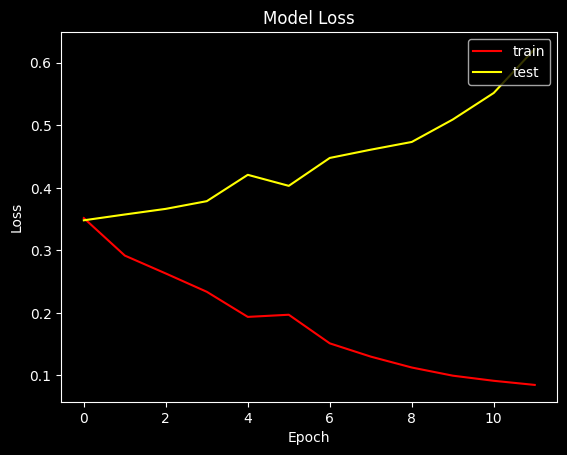

In [35]:
#Visualization of loss at each epoch
import matplotlib.pyplot as plt

plt.style.use('dark_background')
plt.plot(hist.history['loss'],color='red')
plt.plot(hist.history['val_loss'],color='yellow')
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['train','test'],loc='upper right')
plt.show()

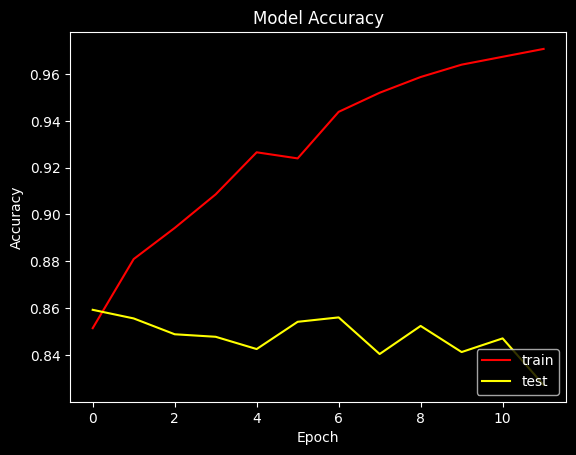

In [36]:
#Model Accuracy at each epoch
plt.plot(hist.history['accuracy'],color='red')
plt.plot(hist.history['val_accuracy'],color='yellow')

plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(['train','test'],loc='lower right')
plt.show()

782/782 ━━━━━━━━━━━━━━━━━━━━ 71s 91ms/step


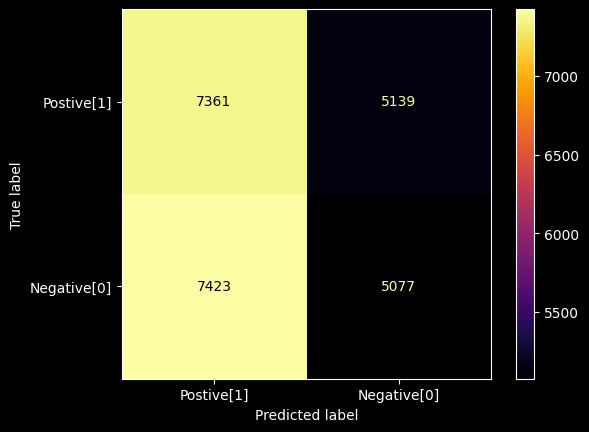

In [38]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import numpy as np
y_pred_prob = model.predict(X_test)
y_pred_classes = (y_pred_prob >= 0.5).astype(int)
cm = confusion_matrix(y_train,y_pred_classes)
disp = ConfusionMatrixDisplay(cm,display_labels=['Postive[1]','Negative[0]'])
disp.plot(cmap='inferno')
plt.style.use('dark_background')
plt.show()

In [39]:
model.save('sentiment_analyzed.h5')

In [41]:
from keras.models import load_model
saved_model = load_model('sentiment_analyzed.h5')
saved_model

<Sequential name=sequential_1, built=True>

In [45]:
# Example sentence
text = "The movie was absolutely fantastic and very moving."

# Preprocess
processed_text = text.lower()
processed_text = processed_text.replace('.','')
processed_text



'the movie was absolutely fantastic and very moving'

In [46]:
#Word_to_id

movie = []
for words in processed_text.split(" "):
    if words in word_to_id:
        movie.append(word_to_id[words]+3)
    else:
        movie.append(2)

movie

[4, 20, 16, 427, 777, 5, 55, 728]

In [47]:
#padding
movie = pad_sequences([movie],maxlen=200)

prediction = saved_model.predict(movie)
print(f"MOVIE REVIEW:{'Positive' if  prediction >=0.5 else 'Negative'}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 882ms/step
MOVIE REVIEW:Positive
